In [30]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

In [3]:
path = './Data/'


In [4]:
df = pd.read_csv(path)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Task 2: Clean and Process

### Task 2.1: Merge 12-month data

In [4]:
os.listdir(path)

['sales2019_3.csv',
 'sales2019_8.csv',
 'sales2019_4.csv',
 'sales2019_10.csv',
 'sales2019_7.csv',
 '.ipynb_checkpoints',
 'sales2019_9.csv',
 'sales2019_2.csv',
 'sales2019_6.csv',
 'sales2019_11.csv',
 'sales2019_5.csv',
 'sales2019_1.csv',
 'sales2019_12.csv']

In [5]:
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
df = result
df.to_csv('annualSales2019.csv', index=False)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


#### 1. What was the best month for sales? How much was earned that month?

In [7]:
## them cot month de sau de dung cho viec phan tich

In [13]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [10]:
df['Order Date'].str.slice(start=0, stop=2)
#df['Order Date'].str[0:2]

0        03
1        03
2        03
3        03
4        03
         ..
25112    12
25113    12
25114    12
25115    12
25116    12
Name: Order Date, Length: 186850, dtype: object

In [18]:
print(set(df['Month']))

{'12', '04', '06', '09', '03', '10', '08', '11', '01', '07', '02', '05'}


### Task 2.3: Get rid of 'NaN' and 'Or' value

In [15]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [17]:
df = df[df['Month'] != 'Or']

## Task 3: Reporting

### Task 3.1: What was the best month for sales? How much was earned for month?

In [23]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [22]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')

In [24]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.000000
1,162009,Lightning Charging Cable,1,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.950000
2,162009,Wired Headphones,2,11.990000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.980000
3,162010,Bose SoundSport Headphones,1,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.989998
4,162011,34in Ultrawide Monitor,1,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.989990


In [25]:
movingColumn = df.pop('Sales')
df.insert(4, 'Sales', movingColumn)

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [27]:
# loc du lieu cho tung thang

In [28]:
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [29]:
salesValue = df.groupby('Month').sum()['Sales']
salesValue

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

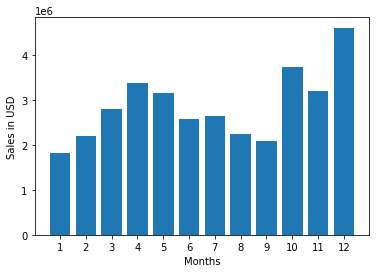

In [33]:
months = range(1,13)
plt.bar(months, height=salesValue)
# bieu do thieu bieu thi thang le
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

Ngoài phân tích theo yêu cầu, còn đặt câu hỏi why?
##### Tại sao tháng 12 có doanh thu cao nhất?
Có thể do kì nghỉ như là giáng sinh hoặc đón năm mới?

'các hãng điện tử lớn thường ra mắt sản phẩm mới vào quý 3

### Task 3.2: What city has the best sales?

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [36]:
sample = '942 Church St, Austin, TX 73301'
sample.split(',')[1]

' Austin'

In [39]:
addressToCity = lambda address: address.split(',')[1]

In [40]:
df['Citys'] = df['Purchase Address'].apply(addressToCity)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Citys
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [42]:
df.groupby('Citys').sum()['Sales']

Citys
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [44]:
citySaleValues = df.groupby('Citys').sum()['Sales']
citySaleValues.max()

8262204.0

In [58]:
cities = list(set(df['Citys']))
cities.sort()
cities

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

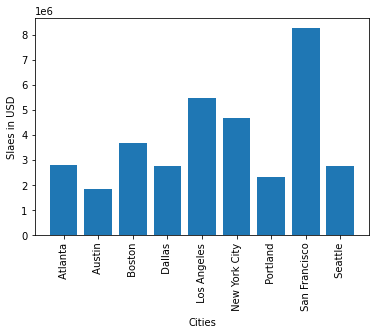

In [59]:
plt.bar(cities, height=citySaleValues)
# bieu do thieu bieu thi thang le
plt.xticks(cities, rotation=90)
plt.xlabel('Cities')
plt.ylabel('Slaes in USD')
plt.show()

##### tại sao thành phố San Francisco lại có doanh thu cao nhất?

Thung lũng silicon valley  tọa lạc ở SF. data?
Có nhiều kĩ sư hơn


### Sau khi đặt ra các câu hỏi và đưa ra giả thuyết, cần tìm thông tin để đưa ra dẫn chứng, từ đó đưa ra kết luận có thể giúp ích cho doanh nghiệp

### Conclusion: What's the actionable insight?

### Task 3.3: What time should we display ads to maximize the likelihood of customer's buying product?

In [60]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Citys
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [61]:
sample = '03/28/19 20:59'
sample.split(' ')

['03/28/19', '20:59']

In [65]:
print(df['Order Date'].dtypes)

datetime64[ns]


In [63]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [67]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Citys,Hour
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [73]:
orderAmountHour = df.groupby('Hour').count()['Quantity Ordered']
print(orderAmountHour)
print('Max : {}'.format(orderAmountHour.max()))

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64
Max : 12905


In [75]:
hours = [hour for hour, order in orderAmountHour.items()]
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

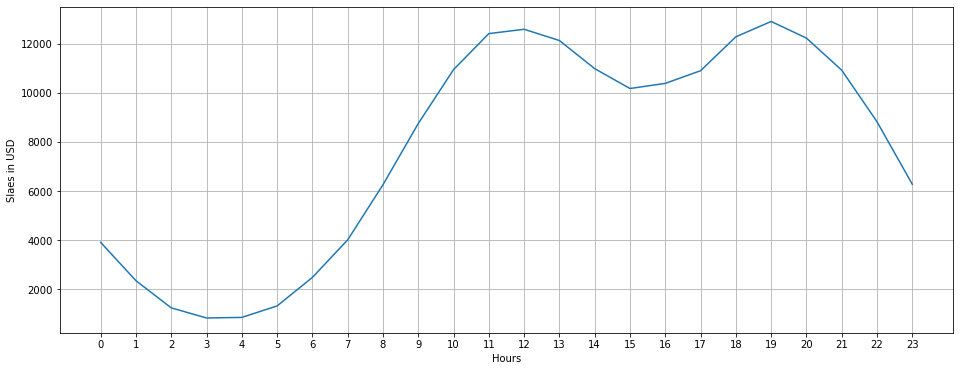

In [80]:
plt.figure(figsize=(16, 6))

plt.plot(hours, orderAmountHour)
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Slaes in USD')
plt.show()

### Task 3.4: What products are most often sold together?

In [81]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Citys,Hour
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [82]:
# dua vao orderID

In [83]:
dfDup = df[df['Order ID'].duplicated(keep=False)]
dfDup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Citys,Hour
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2


In [84]:
# gop cac san pham cung mot don hang lai voi nhau

In [86]:
# do apply df va series khac nhau, apply series yeu cau mot function nen viet function

In [89]:
def joinProduct(product):
    return ','.join(product)

# hoac lambda function
groupProduct = lambda product: ','.join(product)

In [90]:
dfDup['All Products'] = dfDup.groupby('Order ID')['Product'].transform(groupProduct)
dfDup.head()

<ipython-input-90-4c88304a0b82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDup['All Products'] = dfDup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Citys,Hour,All Products
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone,Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone,Lightning Charging Cable"


In [93]:
dfDup = dfDup[['Order ID', 'All Products']].drop_duplicates()
dfDup.head()

,Order ID,All Products
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"


In [94]:
# how to count number of values in column pandas

In [96]:
dfDup['All Products'].value_counts().head(10)

iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: All Products, dtype: int64

### Task 3.5: What product sold the most? Why do you think it sold the most?

In [97]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Citys,Hour
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [99]:
allProducts = df.groupby('Product').sum()['Quantity Ordered']
allProducts

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

In [100]:
productOrders = [product for product, quant in allProducts.items()]
productOrders

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

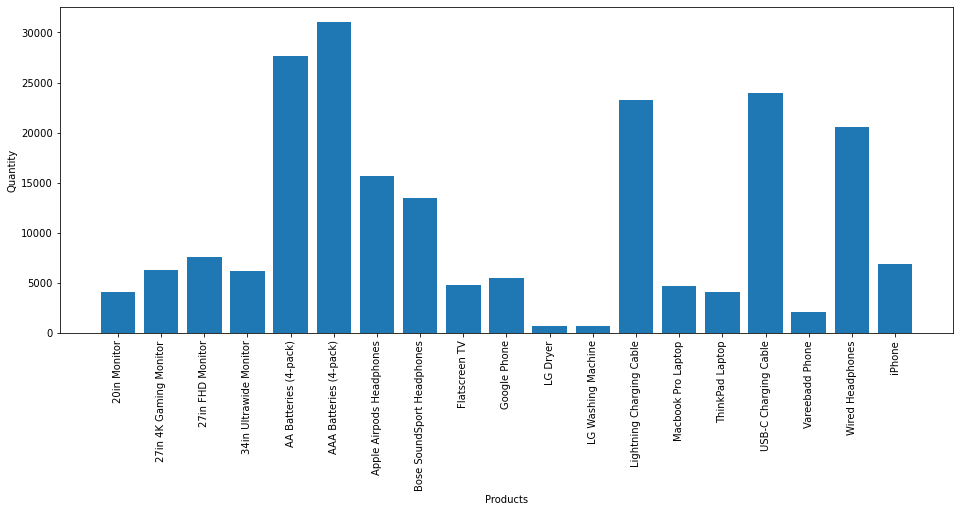

In [103]:
plt.figure(figsize=(16, 6))

plt.bar(productOrders, allProducts)
plt.xticks(productOrders, rotation=90)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

In [104]:
# xem coi gia co anh huong toi doanh thu k

In [108]:
prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

<ipython-input-112-0d9456de9e15>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(productOrders, rotation=90, size=8)


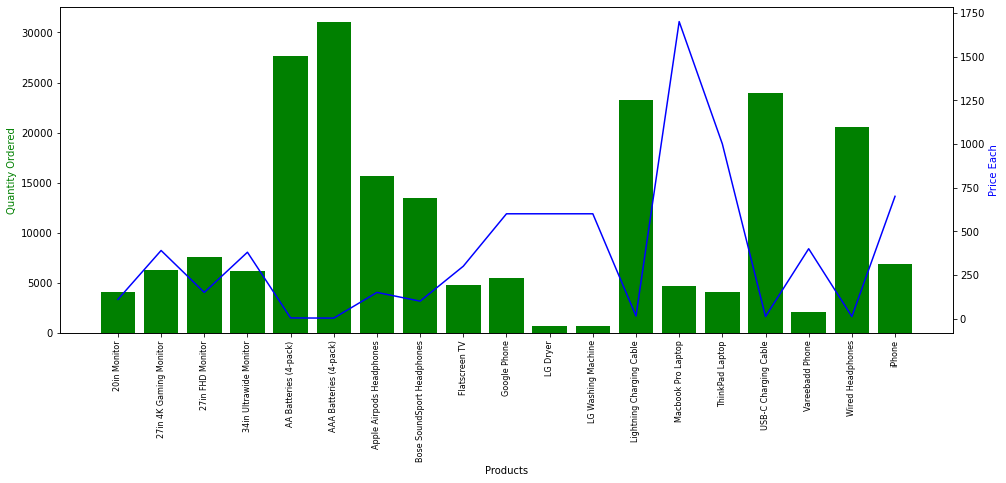

In [112]:
x = productOrders
y1 = allProducts
y2 = prices

fig, ax1 = plt.subplots(figsize=(16, 6))

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(productOrders, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()

# Cuối cùng chuyển lên streamlit và có option upload file data để phân tích